In [1]:
using Distributions, LinearAlgebra, Random, StatsPlots, Optim, Plots

### Q5

In [2]:
# The hat functions
function my_hats(x::Float64, center::Float64; spread=1)
    if x < (center-spread) || x > (center+spread)
        output = 0.0
    else
        output = 1.0 - (1/spread)*abs(x-center)
    end
    return output
end;
my_hats(x[1]/1,0.)

UndefVarError: UndefVarError: x not defined

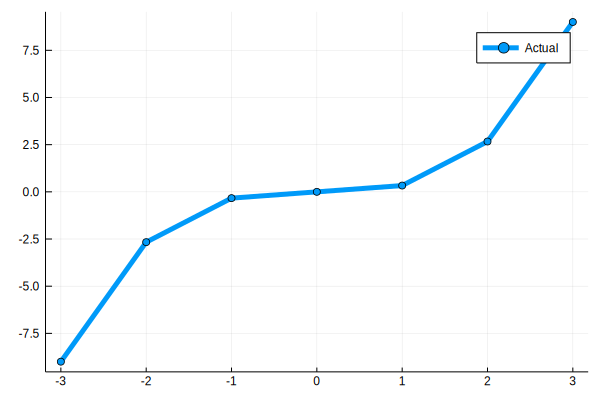

In [3]:
step = 1.0
x = -3.0:step:3.0
y = 1/3 .*x.^3
plot(x,y,linewidth=5,label="Actual",marker=:circle)

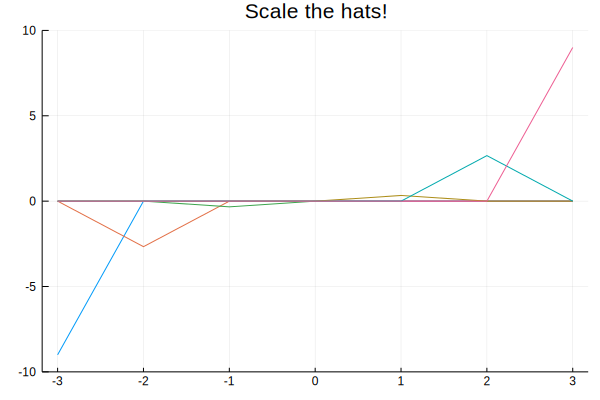

In [4]:
plt = plot(title="Scale the hats!",ylimits=(-10,10),legend=false)
xvec = x
for i in 1:length(y)
    plot!(plt,xvec,y[i] .* my_hats.(xvec,x[i]; spread=step))
end
plt

In [5]:
g(val,x,y) = sum([y[i]*my_hats(val,x[i];spread=step) for i in 1:length(x)])

g (generic function with 1 method)

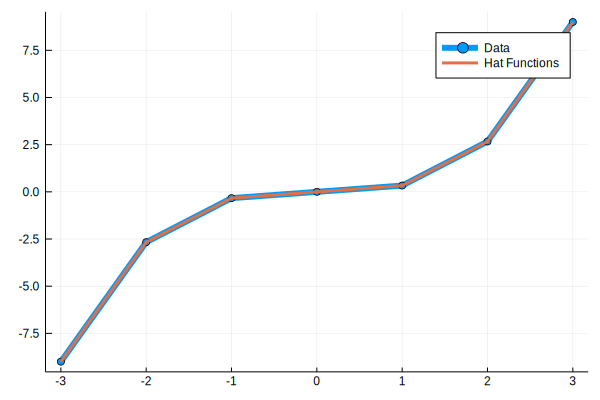

In [6]:
xvec = -3.0:1.0:3.0
hvec = zeros(length(xvec))
for i in 1:length(xvec)
    hvec[i] = g(xvec[i],x,y)
end

plot(x,y,linewidth=6,marker=:circle,label="Data")
plot!(xvec,hvec,linewidth=3,label="Hat Functions")

### Q9

$y = -2$

$y = -x+3$

In [7]:
f(x)=-2
g(x)=-x+3
function myKaczmarz(x,A,b,i)
    x = x + ((b[i] - A[i,:]' * x)/(A[i,:]' * A[i,:])) * A[i,:]
    
    return x, mod(i,2)+1
end

myKaczmarz (generic function with 1 method)

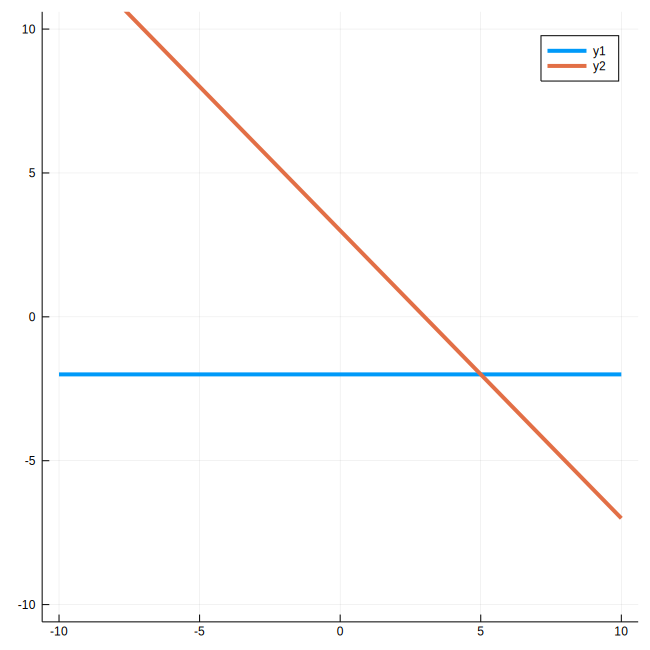

In [8]:
xvec = -10:10
y1 = f.(xvec)
y2 = g.(xvec)
plot(xvec,y1, linewidth=4, ylim=[-10,10], size=(650,650))
plot!(xvec,y2, linewidth=4)
# plot!([0],[0],marker=:circle,color=:black)

In [9]:
A = [0 -2; 1 1]
b = [4;3]


2-element Array{Int64,1}:
 4
 3

In [10]:
i = 1
p1 = [0; 0]

2-element Array{Int64,1}:
 0
 0

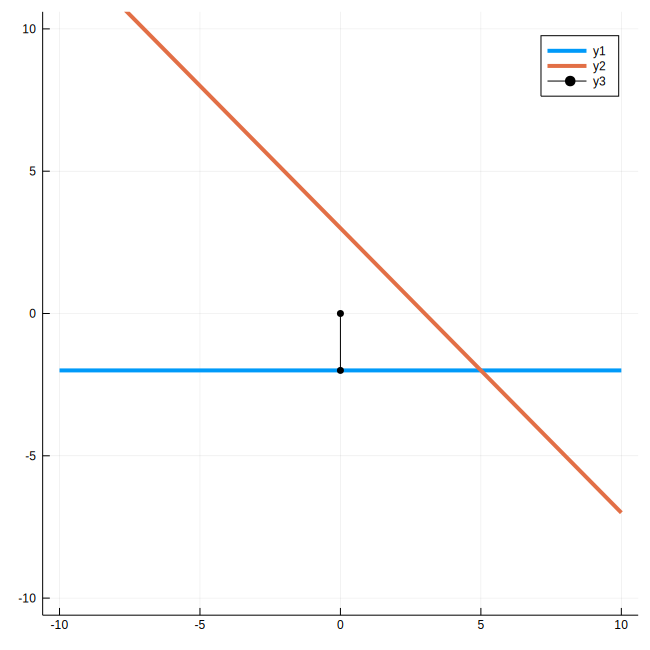

In [11]:
p3 = p1
p2, i = myKaczmarz(p1,A,b,i)
p1 = p2
plot!([p3[1],p1[1]],[p3[2],p1[2]],marker=:circle,color=:black)

In [12]:
p1 = [0;0]
for j=1:3
    p3 = p1
    p2, i = myKaczmarz(p3,A,b,i)
    p1 = p2
    println("Step ",j, ": ", p1)
end

Step 1: [1.5, 1.5]
Step 2: [1.5, -2.0]
Step 3: [3.25, -0.25]


### Q10

In [23]:
A = [5 0; 0 10]
cond(A)

2.0